# SUPPORT VECTOR MACHINE

## DECISION BOUNDARY


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import SVC
from sklearn.manifold import TSNE

In [3]:
df = pd.read_csv('dia_clean.csv')
df

Unnamed: 0  preg   plas  pres  skin  mass   pedi  age  class
0             0     6  148.0  72.0  35.0  33.6  0.627   50      1
1             1     1   85.0  66.0  29.0  26.6  0.351   31      0
2             2     8  183.0  64.0  29.0  23.3  0.672   32      1
3             3     1   89.0  66.0  23.0  28.1  0.167   21      0
4             4     0  137.0  40.0  35.0  43.1  2.288   33      1
..          ...   ...    ...   ...   ...   ...    ...  ...    ...
728         763    10  101.0  76.0  48.0  32.9  0.171   63      0
729         764     2  122.0  70.0  27.0  36.8  0.340   27      0
730         765     5  121.0  72.0  23.0  26.2  0.245   30      0
731         766     1  126.0  60.0  29.0  30.1  0.349   47      1
732         767     1   93.0  70.0  31.0  30.4  0.315   23      0

[733 rows x 9 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  733 non-null    int64  
 1   preg        733 non-null    int64  
 2   plas        733 non-null    float64
 3   pres        733 non-null    float64
 4   skin        733 non-null    float64
 5   mass        733 non-null    float64
 6   pedi        733 non-null    float64
 7   age         733 non-null    int64  
 8   class       733 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 51.7 KB


In [5]:
df.describe()

Unnamed: 0        preg        plas        pres        skin        mass  \
count  733.000000  733.000000  733.000000  733.000000  733.000000  733.000000   
mean   383.461119    3.858117  121.778990   72.358799   29.113233   32.475034   
std    221.923337    3.372025   30.600372   12.346248    8.998907    6.873016   
min      0.000000    0.000000   44.000000   24.000000    7.000000   18.200000   
25%    190.000000    1.000000  100.000000   64.000000   24.000000   27.500000   
50%    382.000000    3.000000  117.000000   72.000000   29.000000   32.400000   
75%    575.000000    6.000000  141.000000   80.000000   33.000000   36.600000   
max    767.000000   17.000000  199.000000  122.000000   99.000000   67.100000   

             pedi         age       class  
count  733.000000  733.000000  733.000000  
mean     0.476502   33.287858    0.343793  
std      0.334200   11.749216    0.475297  
min      0.078000   21.000000    0.000000  
25%      0.245000   24.000000    0.000000  
50%      0.380000   29.000000    0.000000  
75%      0.629000   41.000000    1.000000  
max      2.420000   81.000000    1.000000

In [6]:
df.isnull().sum()

Unnamed: 0    0
preg          0
plas          0
pres          0
skin          0
mass          0
pedi          0
age           0
class         0
dtype: int64

In [7]:
df[df.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, preg, plas, pres, skin, mass, pedi, age, class]
Index: []

In [8]:
X = df.drop(['Unnamed: 0','class'],axis = 1)
y = df['class']
X.head()

preg   plas  pres  skin  mass   pedi  age
0     6  148.0  72.0  35.0  33.6  0.627   50
1     1   85.0  66.0  29.0  26.6  0.351   31
2     8  183.0  64.0  29.0  23.3  0.672   32
3     1   89.0  66.0  23.0  28.1  0.167   21
4     0  137.0  40.0  35.0  43.1  2.288   33

In [9]:
# standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0:5]

array([[ 0.63562555,  0.85747042, -0.02908126,  0.6546113 ,  0.1637904 ,
         0.45063011,  1.42337613],
       [-0.8481755 , -1.20273387, -0.51539072, -0.0125916 , -0.85538075,
        -0.37578585, -0.19485729],
       [ 1.22914597,  2.00202835, -0.67749387, -0.0125916 , -1.33584715,
         0.58537185, -0.10968711],
       [-0.8481755 , -1.07192725, -0.51539072, -0.6797945 , -0.63698693,
        -0.92672983, -1.04655908],
       [-1.14493571,  0.49775221, -2.62273169,  0.6546113 ,  1.54695124,
         5.42409721, -0.02451693]])

### SVM without parameters

In [10]:
# Shuffle split
cv = ShuffleSplit(n_splits = 10,test_size=0.2,random_state= 42)
for train_idx,test_idx in cv.split(X_scaled,y):
    X_train ,X_test = X_scaled[train_idx],X_scaled[test_idx]
    y_train, y_test = y[train_idx],y[test_idx]
    #train svm
    svm_clf = SVC()
    svm_clf.fit(X_train,y_train)
    print("Train Accuracy:",svm_clf.score(X_train,y_train))
    print("Test Accuracy:",svm_clf.score(X_test,y_test))
    break

Train Accuracy: 0.8378839590443686
Test Accuracy: 0.7210884353741497


In [11]:
# Shuffle split
cv = ShuffleSplit(n_splits = 10,test_size=0.2,random_state= 42)
for train_idx,test_idx in cv.split(X_scaled,y):
    X_train ,X_test = X_scaled[train_idx],X_scaled[test_idx]
    y_train, y_test = y[train_idx],y[test_idx]
    #train svm
    svm_clf = SVC()
    svm_clf.fit(X_train,y_train)
    print("Train Accuracy:",svm_clf.score(X_train,y_train))
    print("Test Accuracy:",svm_clf.score(X_test,y_test))

Train Accuracy: 0.8378839590443686
Test Accuracy: 0.7210884353741497
Train Accuracy: 0.8208191126279863
Test Accuracy: 0.7959183673469388
Train Accuracy: 0.8293515358361775
Test Accuracy: 0.7551020408163265
Train Accuracy: 0.8139931740614335
Test Accuracy: 0.7619047619047619
Train Accuracy: 0.8191126279863481
Test Accuracy: 0.7687074829931972
Train Accuracy: 0.8139931740614335
Test Accuracy: 0.7551020408163265
Train Accuracy: 0.8225255972696246
Test Accuracy: 0.7278911564625851
Train Accuracy: 0.8122866894197952
Test Accuracy: 0.7755102040816326
Train Accuracy: 0.810580204778157
Test Accuracy: 0.782312925170068
Train Accuracy: 0.8156996587030717
Test Accuracy: 0.7006802721088435


In [12]:
# taking 1st split for visualization

In [13]:
# reduced dimenisions of X-cols using tsne
data_tsne = TSNE(n_components = 2,perplexity = 30).fit_transform(X_scaled)
data_tsne

array([[ 25.480524 ,   6.1195407],
       [-27.999659 , -12.884777 ],
       [ 24.97183  ,  -2.8914158],
       ...,
       [ -2.4207609,   9.303152 ],
       [  2.0086286,   3.470908 ],
       [-15.048375 , -13.427742 ]], dtype=float32)

In [14]:
# train again on tsne transformed data for visualization

In [15]:
svm_vis = SVC()
svm_vis.fit(data_tsne,y)

# Create meshgrid
x_min,x_max = data_tsne[:,0].min()-1,data_tsne[:,0].max()+1
y_min,y_max = data_tsne[:,1].min()-1,data_tsne[:,1].max()+1
xx , yy = np.meshgrid(np.linspace(x_min,x_max,500),
                      np.linspace(y_min,y_max,500))

#predict on meshgrid
Z = svm_vis.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

In [16]:
# plot decision boundary
plt.contourf(xx,yy,Z,alpha=0.3,cmap = plt.cm.coolwarm)
plt.scatter(data_tsne[:,0],data_tsne[:,1],c=y,cmap = plt.cm.coolwarm,edgecolors = 'k')
plt.title("SVM Decision Boundary")
plt.xlabel("TSNE component 1")
plt.ylabel("TSNE component 2")
plt.colorbar(label = 'Diabetes')
plt.show()

In [17]:
# Shuffle split
cv = ShuffleSplit(n_splits = 10,test_size=0.2,random_state= 42)
for train_idx,test_idx in cv.split(X_scaled,y):
    X_train ,X_test = X_scaled[train_idx],X_scaled[test_idx]
    y_train, y_test = y[train_idx],y[test_idx]
    #train svm
    svm_clf = SVC(kernel='rbf',C=0.5,gamma = 0.05)
    svm_clf.fit(X_train,y_train)
    print("Train Accuracy:",svm_clf.score(X_train,y_train))
    print("Test Accuracy:",svm_clf.score(X_test,y_test))
    break

Train Accuracy: 0.7935153583617748
Test Accuracy: 0.7414965986394558


In [18]:

svm_vis = SVC(kernel='rbf',C=0.5,gamma = 0.05)
svm_vis.fit(data_tsne,y)

# Create meshgrid
x_min,x_max = data_tsne[:,0].min()-1,data_tsne[:,0].max()+1
y_min,y_max = data_tsne[:,1].min()-1,data_tsne[:,1].max()+1
xx , yy = np.meshgrid(np.linspace(x_min,x_max,500),
                      np.linspace(y_min,y_max,500))

#predict on meshgrid
Z = svm_vis.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

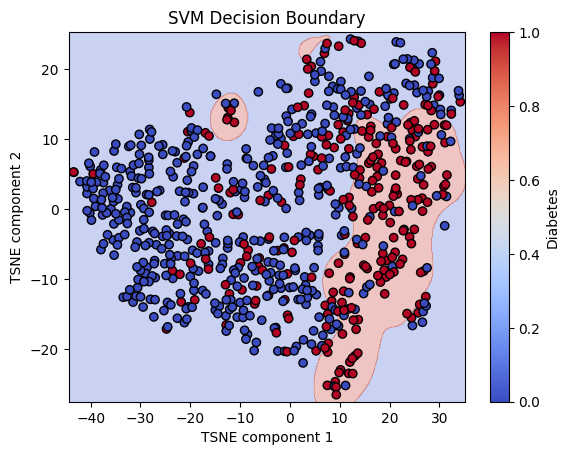

In [19]:
# plot decision boundary
plt.contourf(xx,yy,Z,alpha=0.3,cmap = plt.cm.coolwarm)
plt.scatter(data_tsne[:,0],data_tsne[:,1],c=y,cmap = plt.cm.coolwarm,edgecolors = 'k')
plt.title("SVM Decision Boundary")
plt.xlabel("TSNE component 1")
plt.ylabel("TSNE component 2")
plt.colorbar(label = 'Diabetes')
plt.show()

Train Accuracy: 1.0
Test Accuracy: 0.6394557823129252


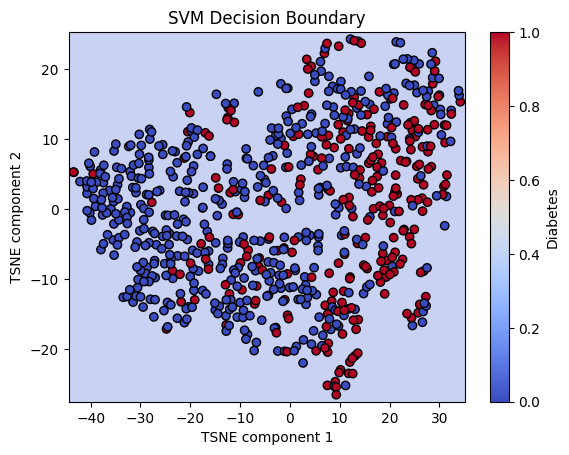

In [20]:
# Shuffle split
cv = ShuffleSplit(n_splits = 10,test_size=0.2,random_state= 42)
for train_idx,test_idx in cv.split(X_scaled,y):
    X_train ,X_test = X_scaled[train_idx],X_scaled[test_idx]
    y_train, y_test = y[train_idx],y[test_idx]
    #train svm
    svm_clf = SVC(kernel='rbf',C=100,gamma = 100)
    svm_clf.fit(X_train,y_train)
    print("Train Accuracy:",svm_clf.score(X_train,y_train))
    print("Test Accuracy:",svm_clf.score(X_test,y_test))
    break
svm_vis = SVC(kernel='rbf',C=100,gamma = 100)
svm_vis.fit(data_tsne,y)

# Create meshgrid
x_min,x_max = data_tsne[:,0].min()-1,data_tsne[:,0].max()+1
y_min,y_max = data_tsne[:,1].min()-1,data_tsne[:,1].max()+1
xx , yy = np.meshgrid(np.linspace(x_min,x_max,500),
                      np.linspace(y_min,y_max,500))

#predict on meshgrid
Z = svm_vis.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
# plot decision boundary
plt.contourf(xx,yy,Z,alpha=0.3,cmap = plt.cm.coolwarm)
plt.scatter(data_tsne[:,0],data_tsne[:,1],c=y,cmap = plt.cm.coolwarm,edgecolors = 'k')
plt.title("SVM Decision Boundary")
plt.xlabel("TSNE component 1")
plt.ylabel("TSNE component 2")
plt.colorbar(label = 'Diabetes')
plt.show()

Train Accuracy: 1.0
Test Accuracy: 0.6394557823129252


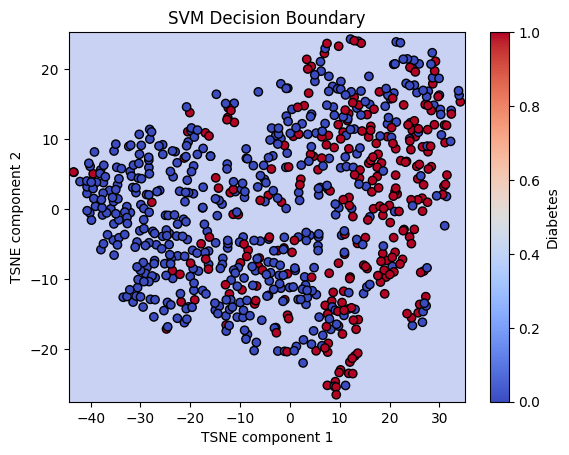

In [21]:
# Shuffle split
cv = ShuffleSplit(n_splits = 10,test_size=0.2,random_state= 42)
for train_idx,test_idx in cv.split(X_scaled,y):
    X_train ,X_test = X_scaled[train_idx],X_scaled[test_idx]
    y_train, y_test = y[train_idx],y[test_idx]
    #train svm
    svm_clf = SVC(kernel='rbf',C=10,gamma = 10)
    svm_clf.fit(X_train,y_train)
    print("Train Accuracy:",svm_clf.score(X_train,y_train))
    print("Test Accuracy:",svm_clf.score(X_test,y_test))
    break
svm_vis = SVC(kernel='rbf',C=10,gamma = 10)
svm_vis.fit(data_tsne,y)

# Create meshgrid
x_min,x_max = data_tsne[:,0].min()-1,data_tsne[:,0].max()+1
y_min,y_max = data_tsne[:,1].min()-1,data_tsne[:,1].max()+1
xx , yy = np.meshgrid(np.linspace(x_min,x_max,500),
                      np.linspace(y_min,y_max,500))

#predict on meshgrid
Z = svm_vis.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
# plot decision boundary
plt.contourf(xx,yy,Z,alpha=0.3,cmap = plt.cm.coolwarm)
plt.scatter(data_tsne[:,0],data_tsne[:,1],c=y,cmap = plt.cm.coolwarm,edgecolors = 'k')
plt.title("SVM Decision Boundary")
plt.xlabel("TSNE component 1")
plt.ylabel("TSNE component 2")
plt.colorbar(label = 'Diabetes')
plt.show()

In [22]:

# Shuffle split
cv = ShuffleSplit(n_splits = 10,test_size=0.2,random_state= 42)
for train_idx,test_idx in cv.split(X_scaled,y):
    X_train ,X_test = X_scaled[train_idx],X_scaled[test_idx]
    y_train, y_test = y[train_idx],y[test_idx]
    #train svm
    svm_clf = SVC(kernel='rbf',C=5,gamma = 0.05)
    svm_clf.fit(X_train,y_train)
    print("Train Accuracy:",svm_clf.score(X_train,y_train))
    print("Test Accuracy:",svm_clf.score(X_test,y_test))
    break
svm_vis = SVC(kernel='rbf',C=5,gamma = 0.05)
svm_vis.fit(data_tsne,y)

# Create meshgrid
x_min,x_max = data_tsne[:,0].min()-1,data_tsne[:,0].max()+1
y_min,y_max = data_tsne[:,1].min()-1,data_tsne[:,1].max()+1
xx , yy = np.meshgrid(np.linspace(x_min,x_max,500),
                      np.linspace(y_min,y_max,500))

#predict on meshgrid
Z = svm_vis.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
# plot decision boundary
plt.contourf(xx,yy,Z,alpha=0.3,cmap = plt.cm.coolwarm)
plt.scatter(data_tsne[:,0],data_tsne[:,1],c=y,cmap = plt.cm.coolwarm,edgecolors = 'k')
plt.title("SVM Decision Boundary")
plt.xlabel("TSNE component 1")
plt.ylabel("TSNE component 2")
plt.colorbar(label = 'Diabetes')
plt.show()

Train Accuracy: 0.8293515358361775
Test Accuracy: 0.7346938775510204


In [23]:
# Shuffle split
cv = ShuffleSplit(n_splits = 10,test_size=0.2,random_state= 42)
for train_idx,test_idx in cv.split(X_scaled,y):
    X_train ,X_test = X_scaled[train_idx],X_scaled[test_idx]
    y_train, y_test = y[train_idx],y[test_idx]
    #train svm
    svm_clf = SVC(kernel='linear',C=10,gamma = 10)
    svm_clf.fit(X_train,y_train)
    print("Train Accuracy:",svm_clf.score(X_train,y_train))
    print("Test Accuracy:",svm_clf.score(X_test,y_test))
    break
svm_vis = SVC(kernel='linear',C=10,gamma = 10)
svm_vis.fit(data_tsne,y)

# Create meshgrid
x_min,x_max = data_tsne[:,0].min()-1,data_tsne[:,0].max()+1
y_min,y_max = data_tsne[:,1].min()-1,data_tsne[:,1].max()+1
xx , yy = np.meshgrid(np.linspace(x_min,x_max,500),
                      np.linspace(y_min,y_max,500))

#predict on meshgrid
Z = svm_vis.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
# plot decision boundary
plt.contourf(xx,yy,Z,alpha=0.3,cmap = plt.cm.coolwarm)
plt.scatter(data_tsne[:,0],data_tsne[:,1],c=y,cmap = plt.cm.coolwarm,edgecolors = 'k')
plt.title("SVM Decision Boundary")
plt.xlabel("TSNE component 1")
plt.ylabel("TSNE component 2")
plt.colorbar(label = 'Diabetes')
plt.show()

Train Accuracy: 0.7798634812286689
Test Accuracy: 0.7482993197278912


In [ ]:
#svm_vis = SVC(kernel='poly',C=10,gamma = 10,degree = 2)

# DECISION TREE


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('iris.csv')
df

sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [6]:
df[df.duplicated()]

sepal.length  sepal.width  petal.length  petal.width    variety
142           5.8          2.7           5.1          1.9  Virginica

In [7]:
df = df.drop_duplicates()
df

sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[149 rows x 5 columns]

In [8]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [9]:
df = df.reset_index(drop=True)
df

sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
144           6.7          3.0           5.2          2.3  Virginica
145           6.3          2.5           5.0          1.9  Virginica
146           6.5          3.0           5.2          2.0  Virginica
147           6.2          3.4           5.4          2.3  Virginica
148           5.9          3.0           5.1          1.8  Virginica

[149 rows x 5 columns]

In [10]:
# label encoder on target
le = LabelEncoder()
df.iloc[:,-1] = le.fit_transform(df.iloc[:,-1])
df.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [12]:
## still object
df['variety'] = pd.to_numeric(le.fit_transform(df['variety']))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [13]:
X = df.drop(columns = ['variety'],axis = 1)
y = df['variety']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify = y)
X_train

sepal.length  sepal.width  petal.length  petal.width
4             5.0          3.6           1.4          0.2
18            5.7          3.8           1.7          0.3
115           6.4          3.2           5.3          2.3
124           6.7          3.3           5.7          2.1
2             4.7          3.2           1.3          0.2
..            ...          ...           ...          ...
13            4.3          3.0           1.1          0.1
61            5.9          3.0           4.2          1.5
38            4.4          3.0           1.3          0.2
44            5.1          3.8           1.9          0.4
21            5.1          3.7           1.5          0.4

[104 rows x 4 columns]

In [15]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5555555555555556, 0.95, 'x[2] <= 2.45\nentropy = 1.585\nsamples = 104\nvalue = [35, 35, 34]'),
 Text(0.4444444444444444, 0.85, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.5, 0.8999999999999999, 'True  '),
 Text(0.6666666666666666, 0.85, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.6111111111111112, 0.8999999999999999, '  False'),
 Text(0.5555555555555556, 0.75, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.7777777777777778, 0.75, 'x[2] <= 5.15\nentropy = 0.552\nsamples = 39\nvalue = [0, 5, 34]'),
 Text(0.6666666666666666, 0.65, 'x[0] <= 6.6\nentropy = 0.94\nsamples = 14\nvalue = [0, 5, 9]'),
 Text(0.5555555555555556, 0.55, 'x[3] <= 1.85\nentropy = 0.811\nsamples = 12\nvalue = [0, 3, 9]'),
 Text(0.4444444444444444, 0.45, 'x[1] <= 3.1\nentropy = 0.954\nsamples = 8\nvalue = [0, 3, 5]'),
 Text(0.3333333333333333, 0.35, 'x[3] <= 1.7\nentropy = 0.863\nsamples = 7\nvalue = [0, 2, 5]'),
 Text(0.2222222222222222, 0.25, 'x[1] <=

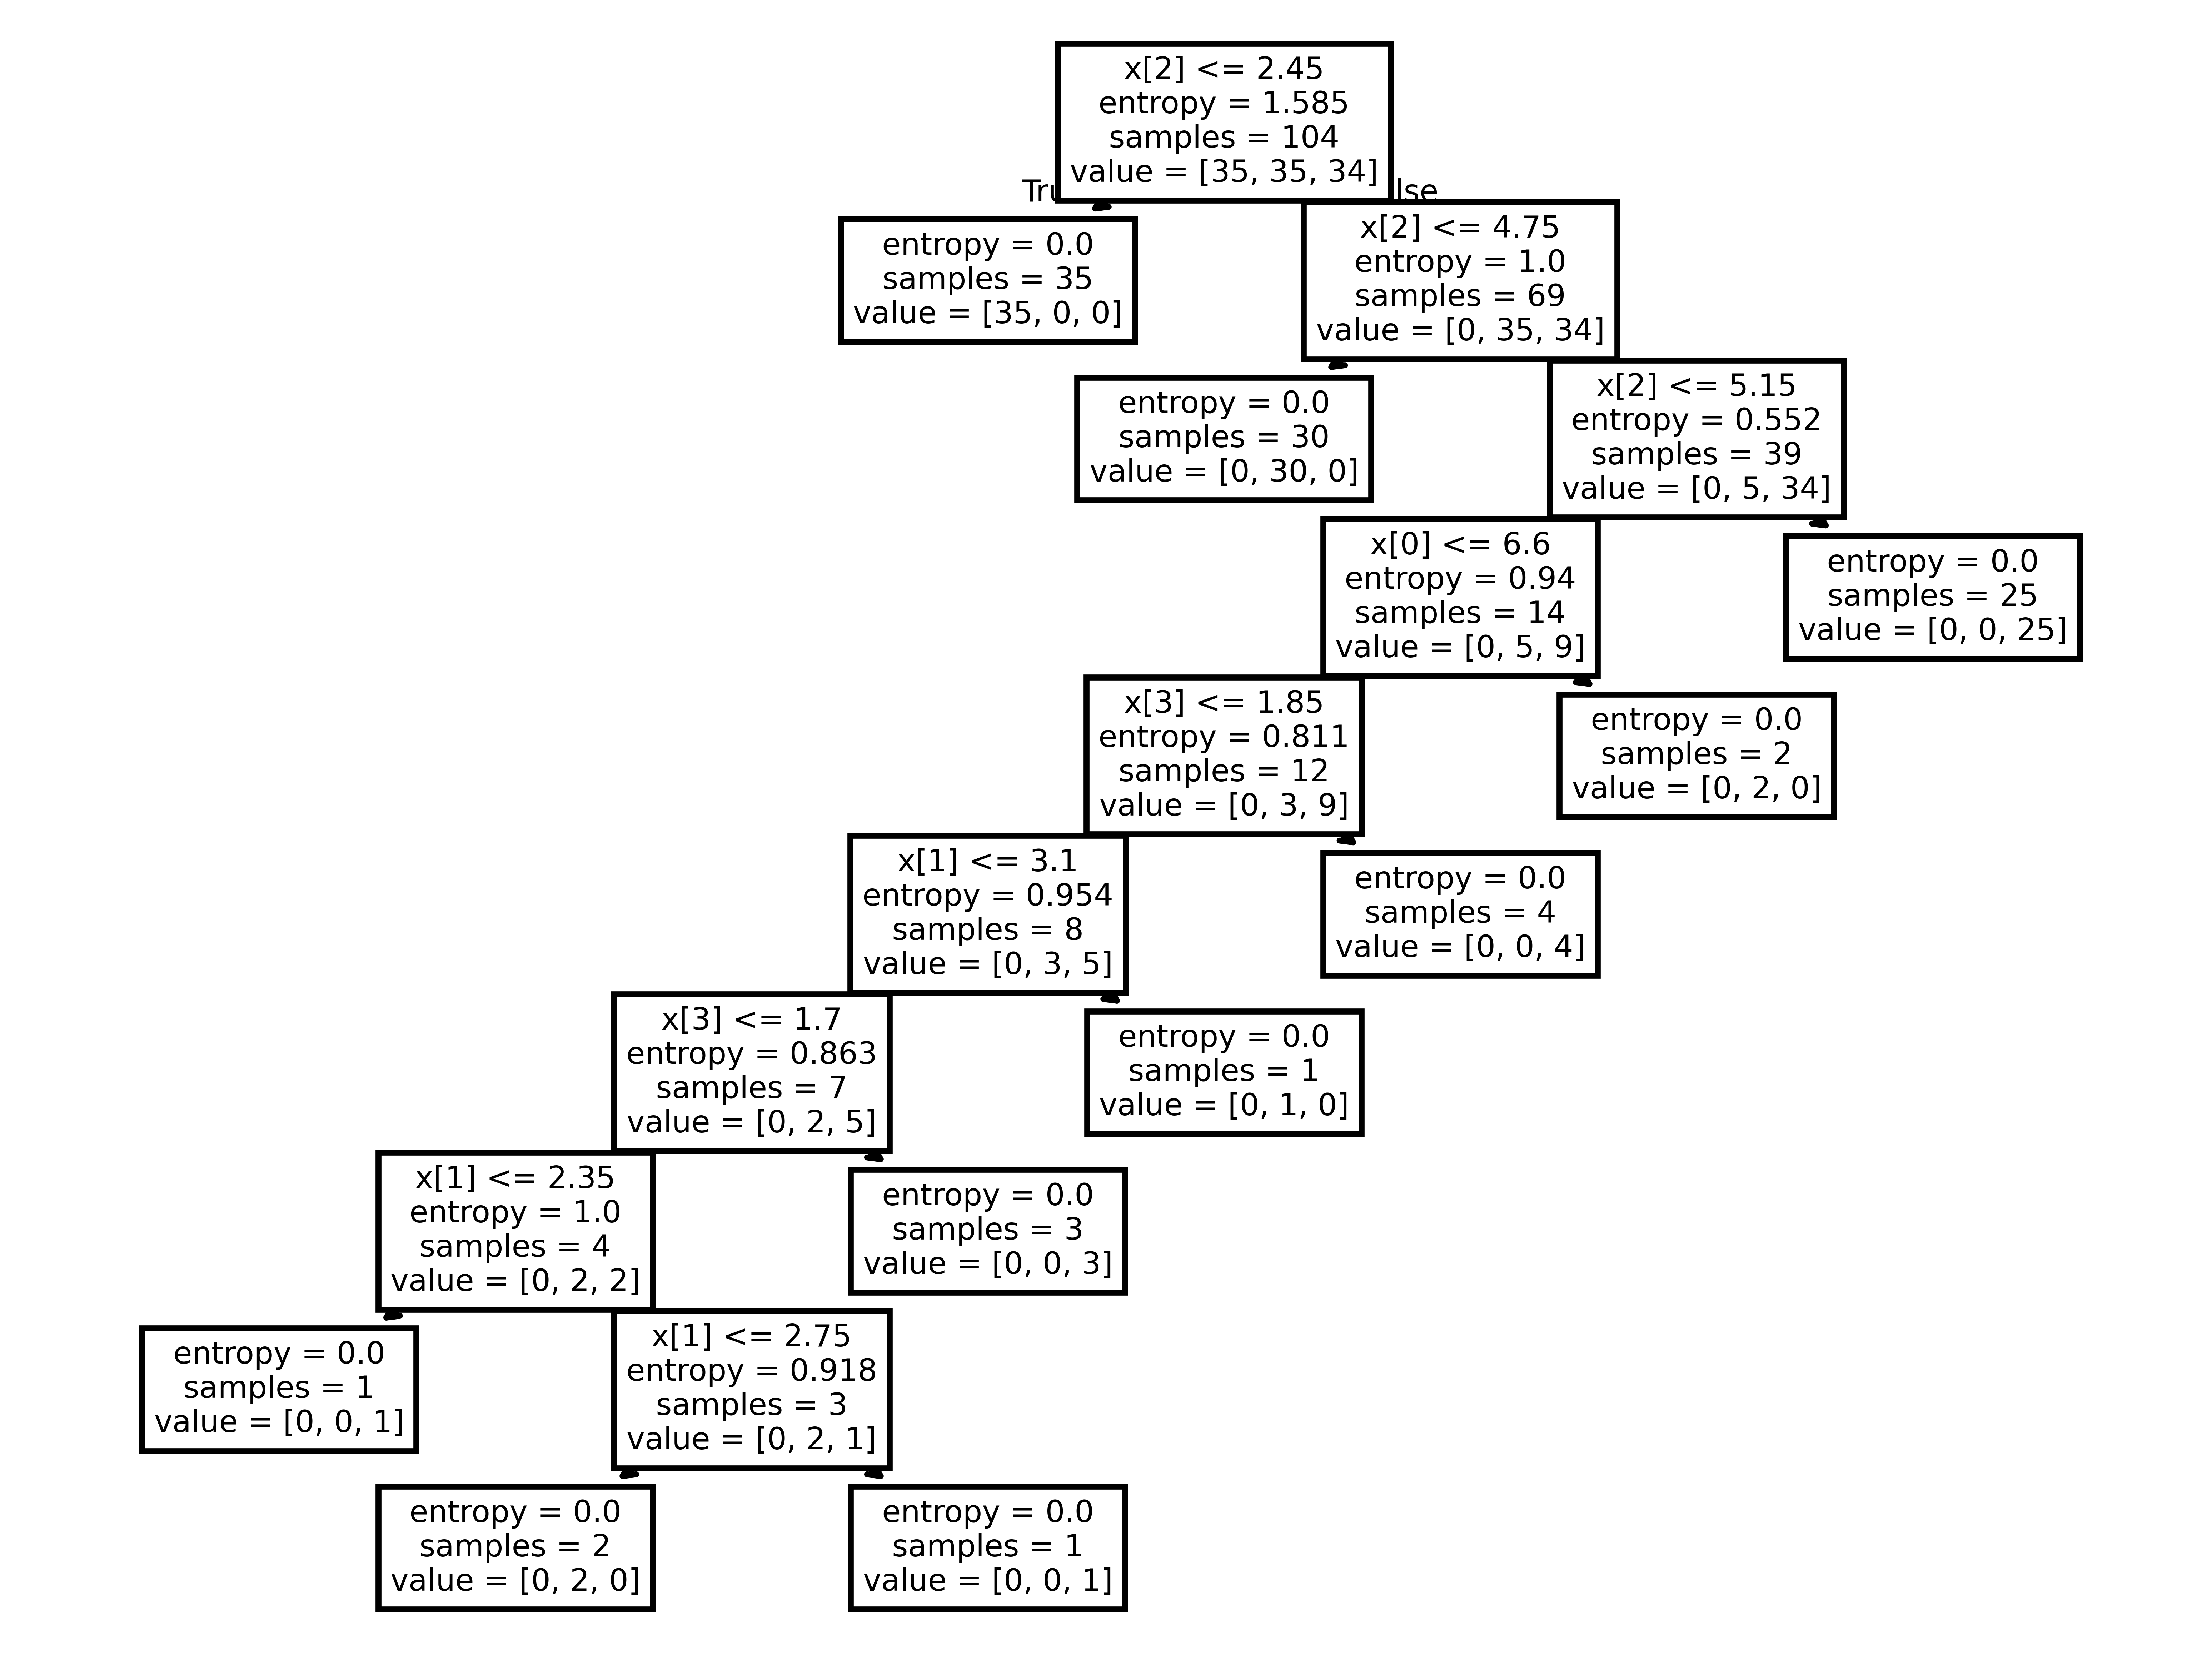

In [16]:
# plot decision tree
plt.figure(dpi = 1200)
tree.plot_tree(model)

[Text(0.5555555555555556, 0.95, 'petal_length(cm) <= 2.45\nentropy = 1.585\nsamples = 104\nvalue = [35, 35, 34]\nclass = setosa'),
 Text(0.4444444444444444, 0.85, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(0.5, 0.8999999999999999, 'True  '),
 Text(0.6666666666666666, 0.85, 'petal_length(cm) <= 4.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]\nclass = versicolor'),
 Text(0.6111111111111112, 0.8999999999999999, '  False'),
 Text(0.5555555555555556, 0.75, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = versicolor'),
 Text(0.7777777777777778, 0.75, 'petal_length(cm) <= 5.15\nentropy = 0.552\nsamples = 39\nvalue = [0, 5, 34]\nclass = virginica'),
 Text(0.6666666666666666, 0.65, 'sepal length(cm) <= 6.6\nentropy = 0.94\nsamples = 14\nvalue = [0, 5, 9]\nclass = virginica'),
 Text(0.5555555555555556, 0.55, 'petal_width(cm) <= 1.85\nentropy = 0.811\nsamples = 12\nvalue = [0, 3, 9]\nclass = virginica'),
 Text(0.4444444444444444, 0.45, 'sepal_width(c

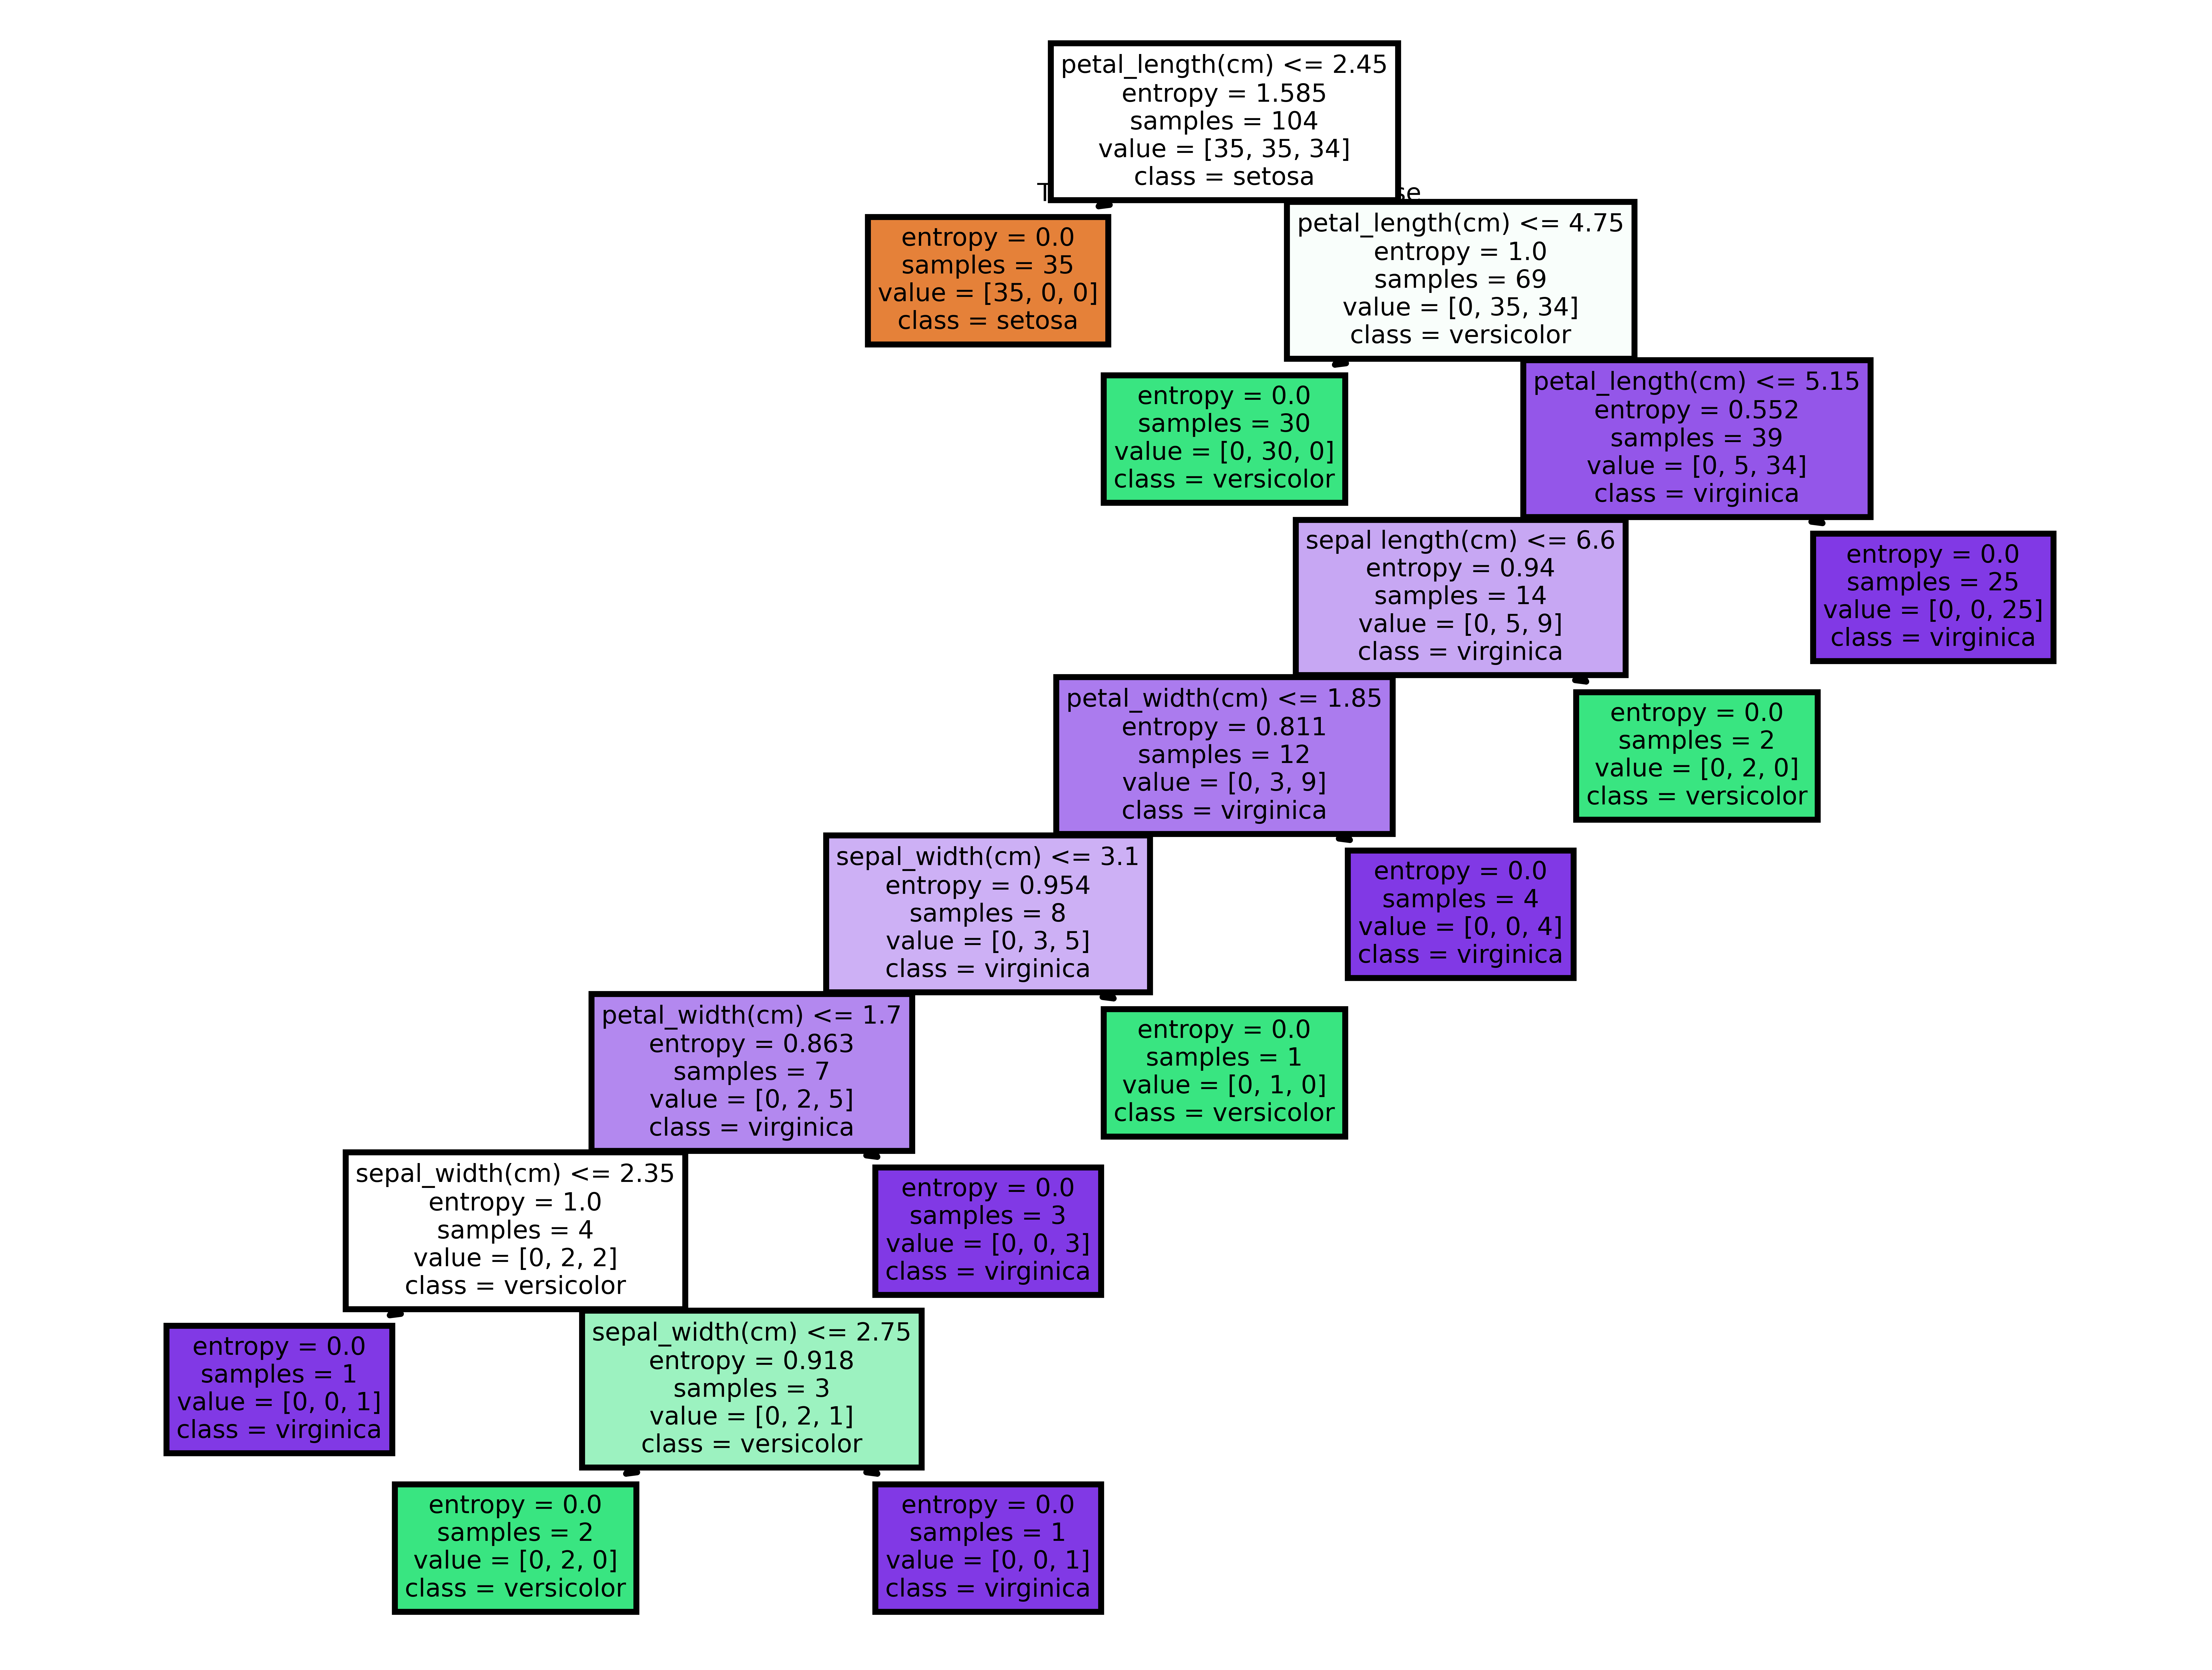

In [17]:
# decision tree with col names
fn = ['sepal length(cm)','sepal_width(cm)','petal_length(cm)','petal_width(cm)']
cn = ['setosa','versicolor','virginica']
plt.figure(dpi = 1500)
tree.plot_tree(model,feature_names = fn,class_names = cn,filled=True)

In [18]:
pred = model.predict(X_test)
pred

array([2, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [20]:
print(model.feature_importances_)

[0.02080221 0.03393735 0.92013209 0.02512835]


In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 13]])

## DECISION TREE GINI INDEX PRUNING

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [78]:
df = pd.read_csv('iris.csv')
df

sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [80]:
df.describe()

sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [81]:
df.drop_duplicates(keep='first')

sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[149 rows x 5 columns]

In [82]:
le = LabelEncoder()
df['variety'] = pd.to_numeric(le.fit_transform(df['variety']))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [83]:
X = df.drop(columns = ['variety'],axis = 1)
y = df['variety']

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify = y)
X_train

sepal.length  sepal.width  petal.length  petal.width
33            5.5          4.2           1.4          0.2
20            5.4          3.4           1.7          0.2
115           6.4          3.2           5.3          2.3
124           6.7          3.3           5.7          2.1
35            5.0          3.2           1.2          0.2
..            ...          ...           ...          ...
41            4.5          2.3           1.3          0.3
92            5.8          2.6           4.0          1.2
26            5.0          3.4           1.6          0.4
3             4.6          3.1           1.5          0.2
42            4.4          3.2           1.3          0.2

[105 rows x 4 columns]

In [85]:
# ccp cost complexity pruning 

In [86]:
model1 = DecisionTreeClassifier(criterion = 'gini',max_depth= None,ccp_alpha = 0.12)
model1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.12)

[Text(0.5, 0.5, 'gini = 0.667\nsamples = 105\nvalue = [35, 35, 35]')]

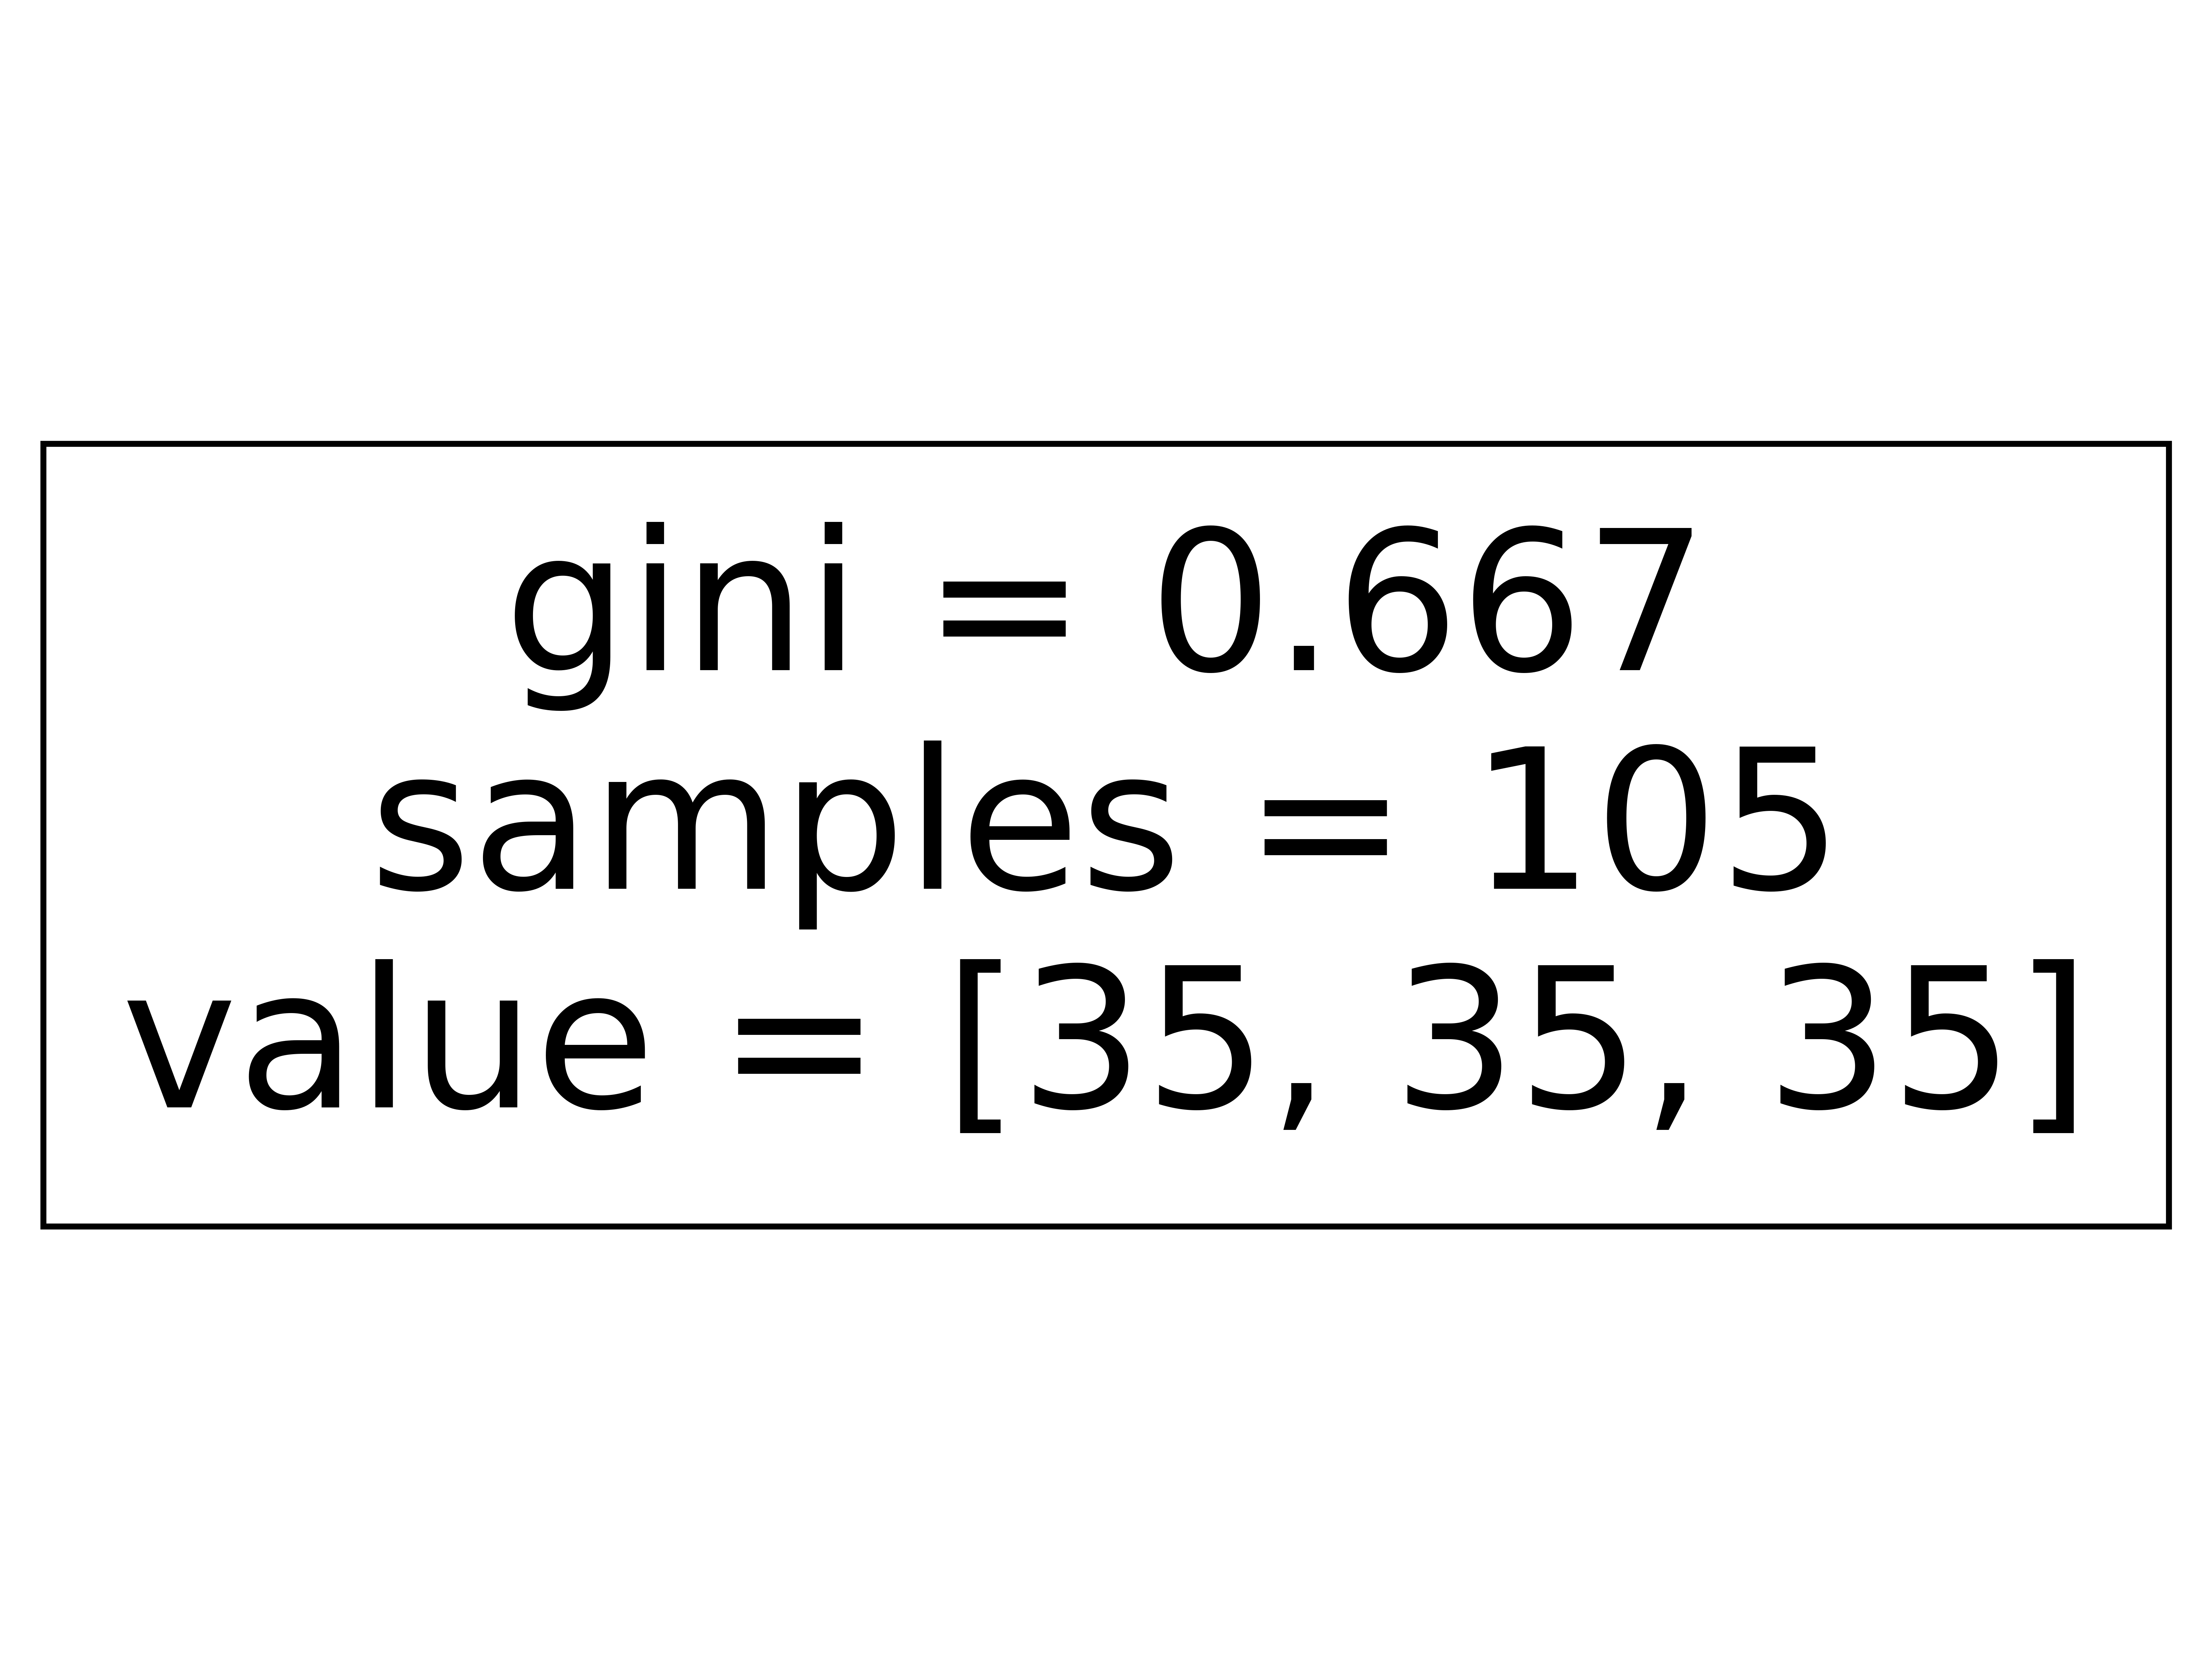

In [87]:
# plot decision tree
plt.figure(dpi = 1200)
tree.plot_tree(model)

[Text(0.5, 0.5, 'gini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa')]

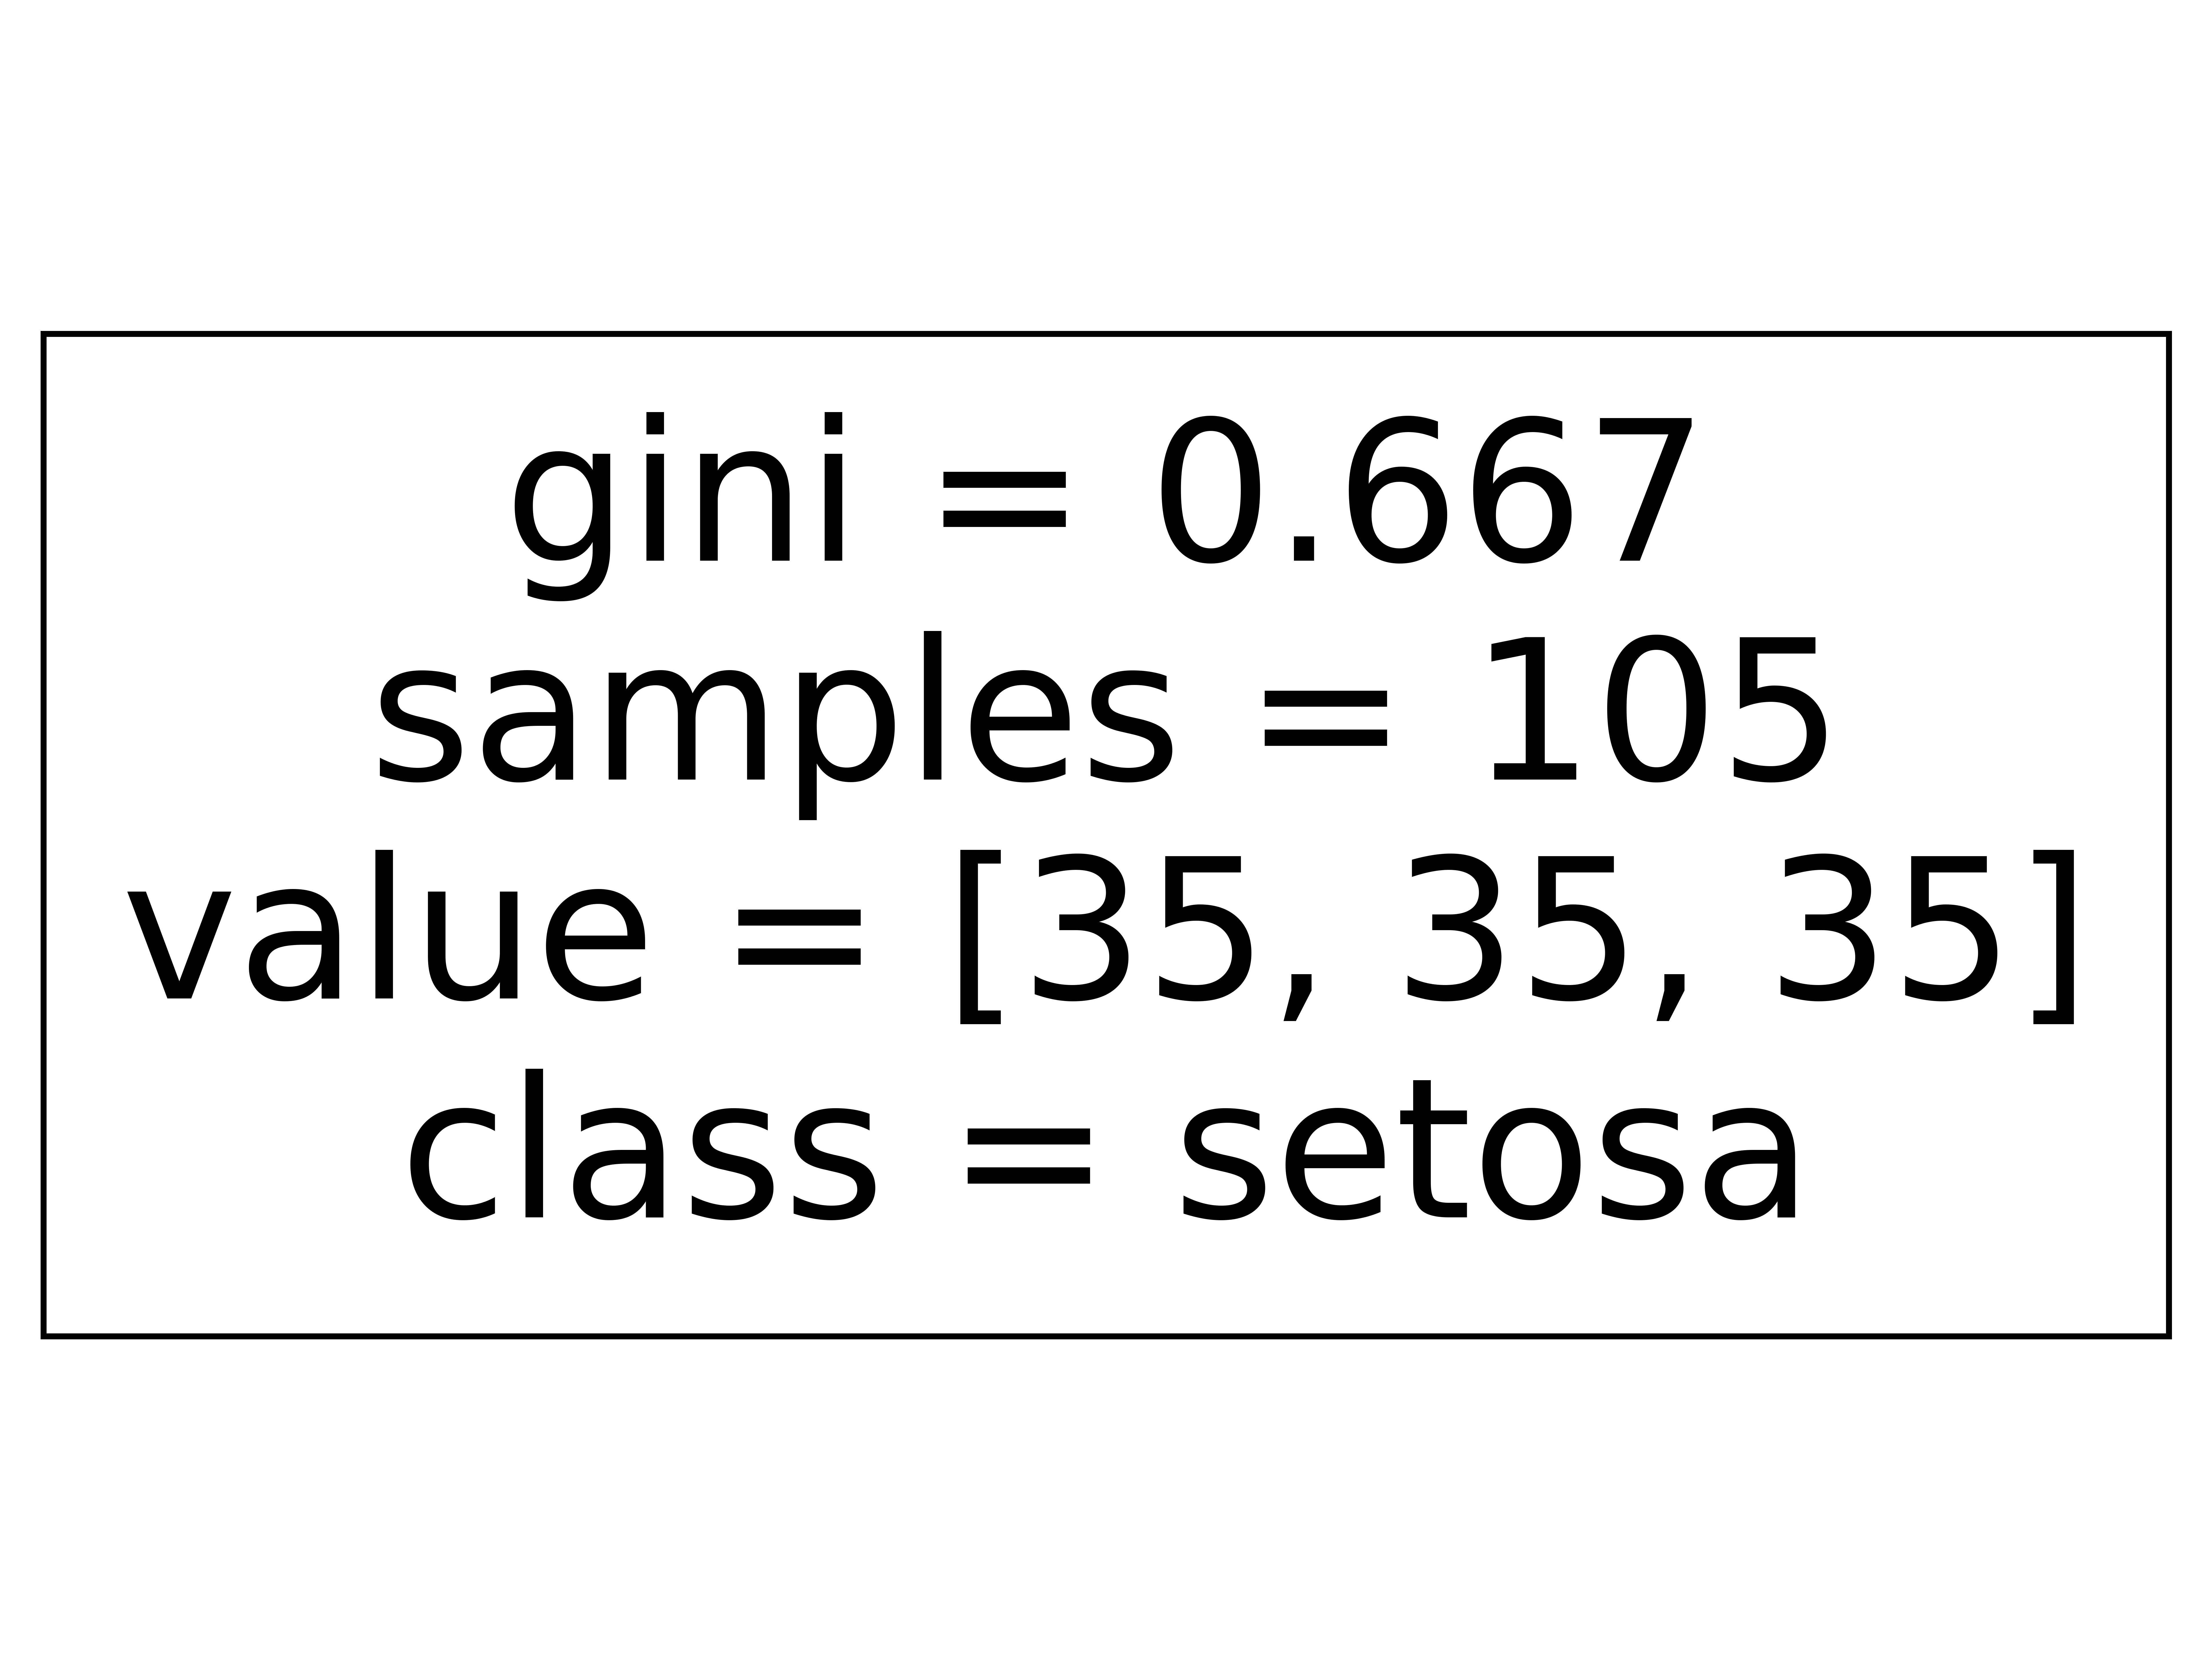

In [88]:
# decision tree with col names
fn = ['sepal length(cm)','sepal_width(cm)','petal_length(cm)','petal_width(cm)']
cn = ['setosa','versicolor','virginica']
plt.figure(dpi = 1500)
tree.plot_tree(model,feature_names = fn,class_names = cn,filled=True)

In [89]:
pred1 = model1.predict(X_test)
pred1

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [90]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [91]:
#list the array of alphas
path = model.cost_complexity_pruning_path(X_train,y_train)
alphas = path['ccp_alphas']
alphas

array([0.        , 0.00922619, 0.01269841, 0.01269841, 0.02678571,
       0.25      , 0.33333333])

In [92]:
from sklearn.metrics import accuracy_score 

In [93]:
# selection optimla ccp_alpha
train_accuracy,test_accuracy = [],[]
for each in alphas:
    model = DecisionTreeClassifier(criterion = 'gini',ccp_alpha = each)
    model.fit(X_train,y_train)
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
    train_accuracy.append(accuracy_score(y_train,train_predict))
    test_accuracy.append(accuracy_score(y_test,test_predict))


In [94]:
 train_accuracy, test_accuracy

([1.0,
  0.9904761904761905,
  0.9714285714285714,
  0.9523809523809523,
  0.9523809523809523,
  0.6666666666666666,
  0.3333333333333333],
 [0.9777777777777777,
  0.9777777777777777,
  0.9777777777777777,
  0.9777777777777777,
  0.9555555555555556,
  0.6666666666666666,
  0.3333333333333333])

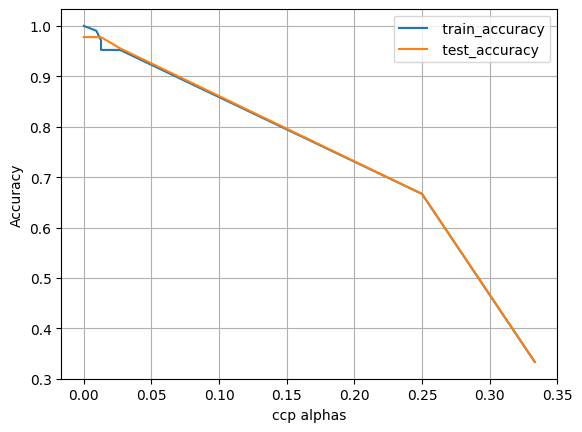

In [95]:
plt.plot(alphas,train_accuracy,label = ' train_accuracy')
plt.plot(alphas,test_accuracy,label = ' test_accuracy')
plt.xlabel('ccp alphas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()